### Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv(r"E:\Data science\Job-a-thon\train_0OECtn8.csv")
data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [17]:
data.isnull().sum() ### Checking null vales

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [18]:
data.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [21]:
data = pd.get_dummies(data)

### EDA(Exploratory data analysis)

In [22]:
import warnings 
warnings.filterwarnings('ignore')

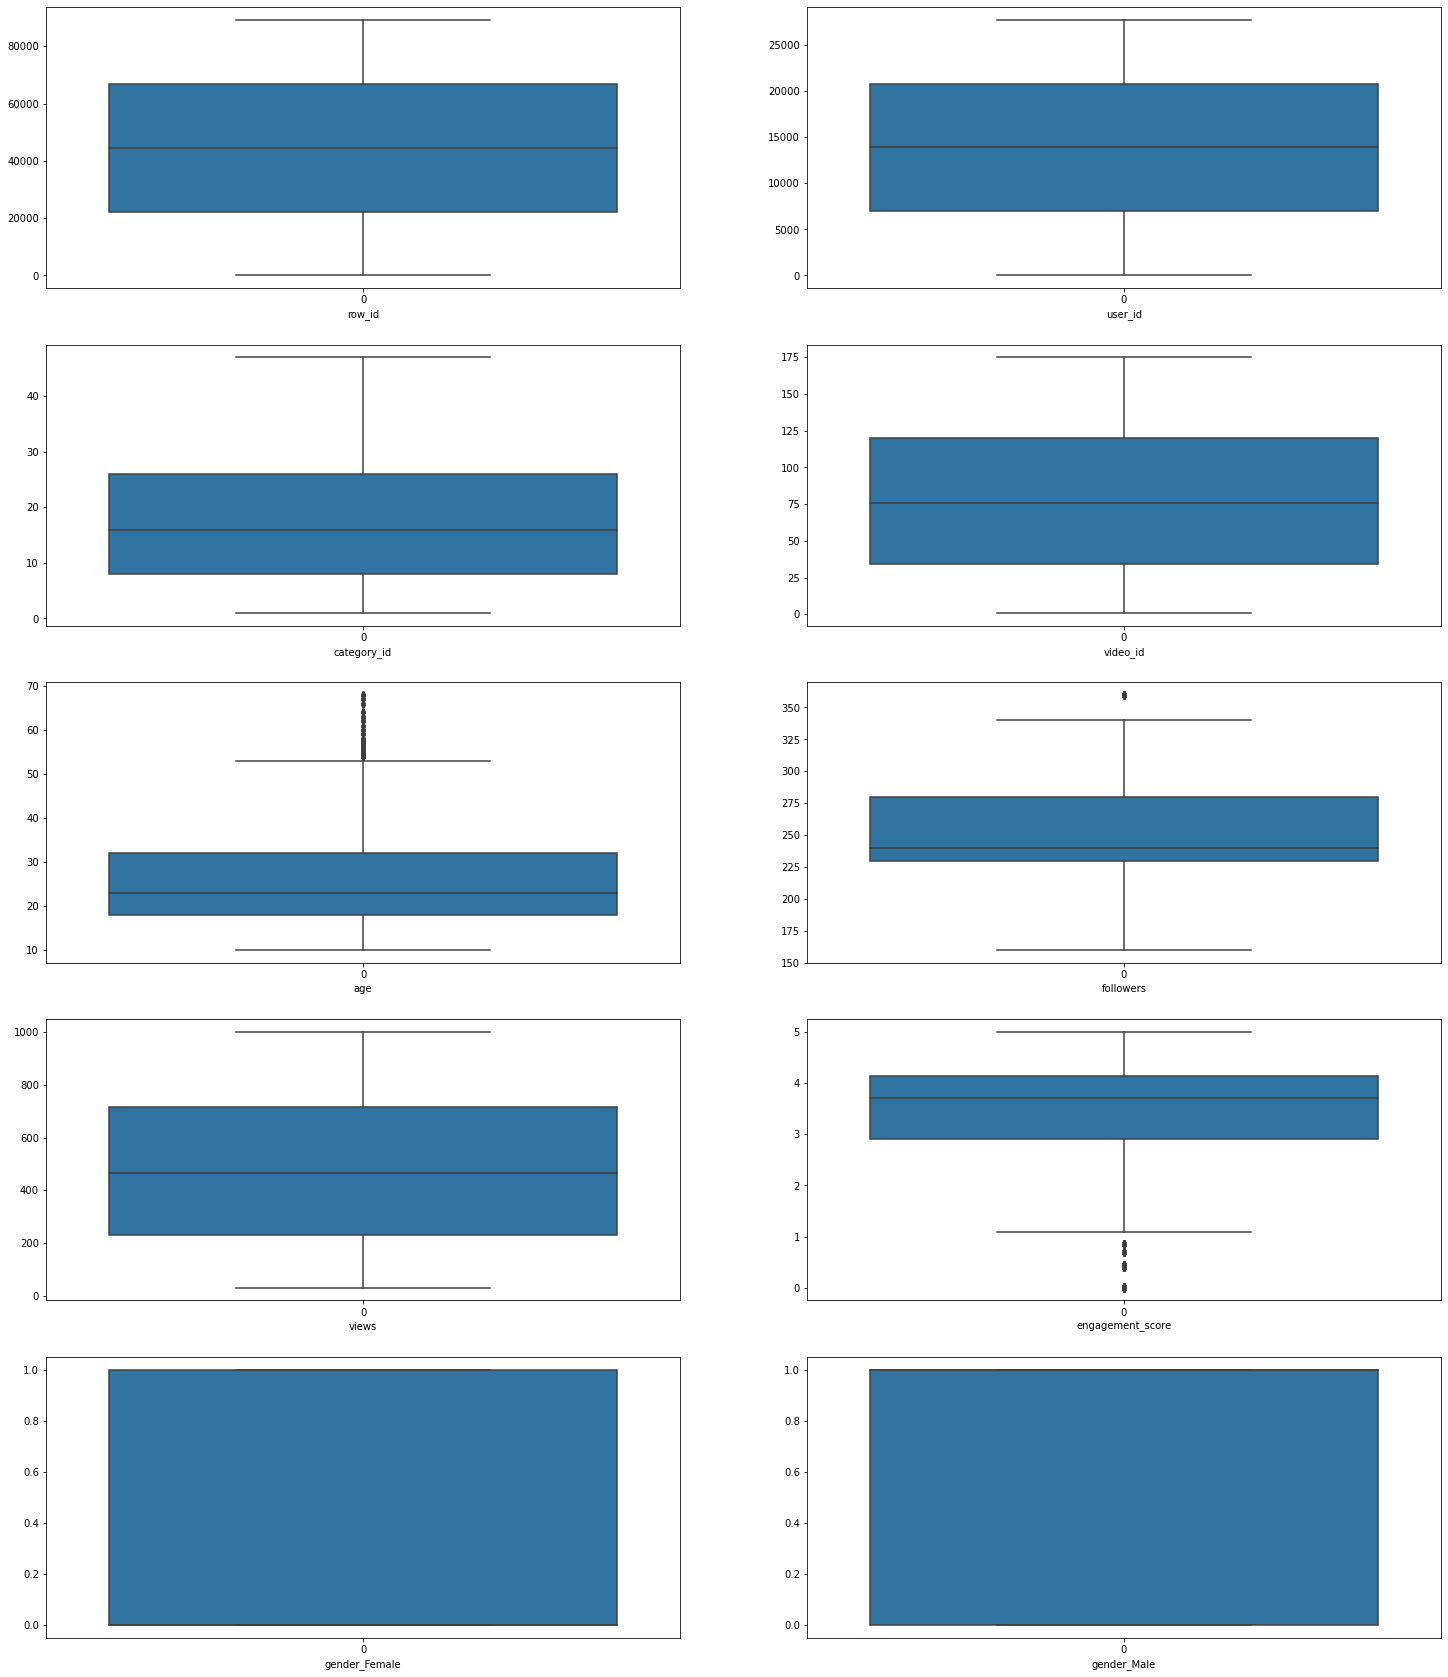

In [23]:
### checking for outliers
plt.figure(figsize=(25,30))
graph=1

for column in data:
    if graph<=10:
        ax=plt.subplot(5,2,graph)
        sns.boxplot(data = data[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

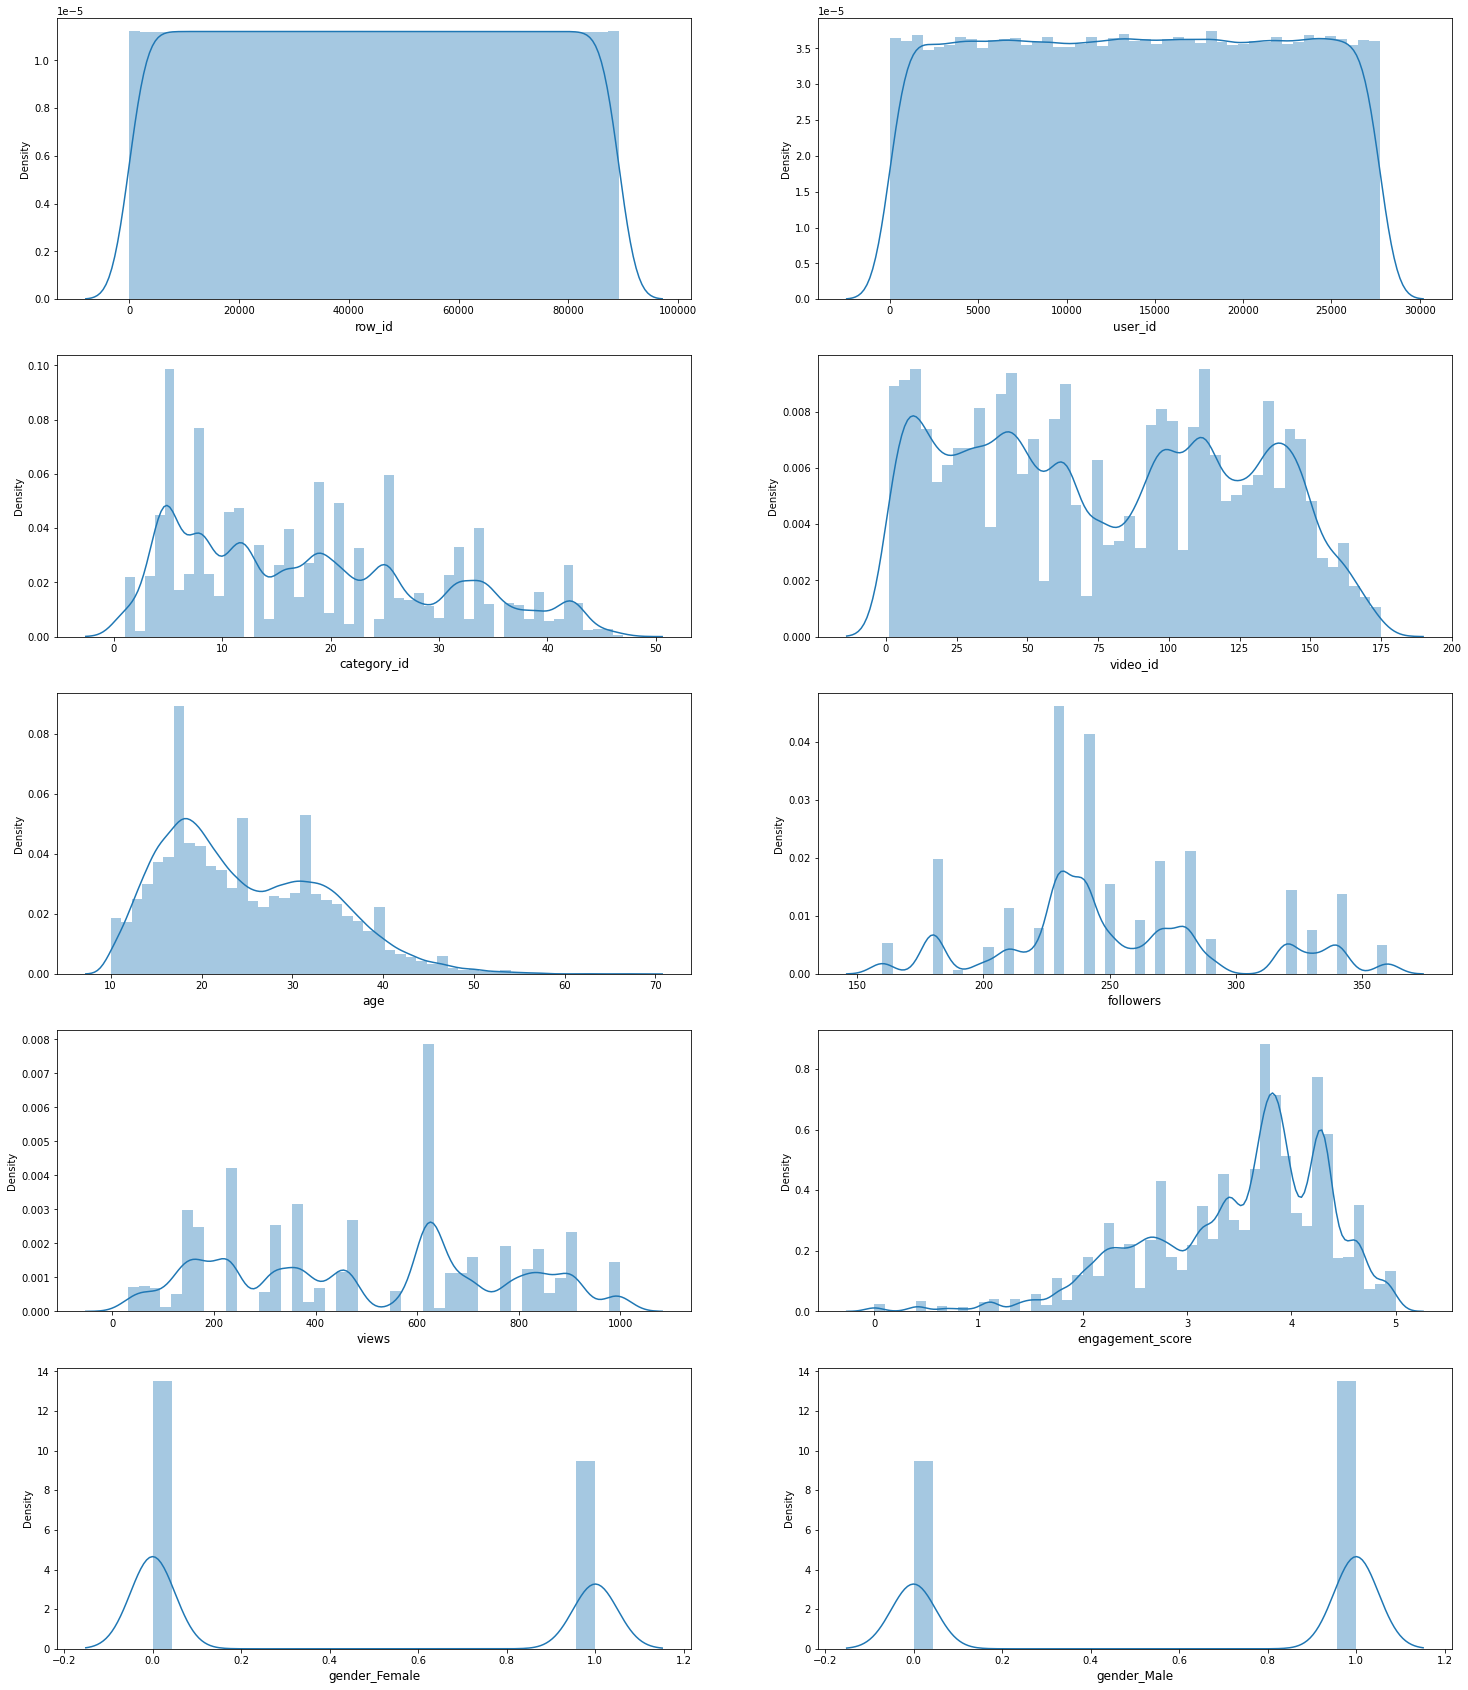

In [24]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=10: #as there are 10 columns in data
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

In [25]:
abs(data.corr()['engagement_score']).sort_values(ascending=True)

followers                          0.000855
user_id                            0.002900
row_id                             0.003368
video_id                           0.030552
views                              0.084679
category_id                        0.094288
profession_Other                   0.120076
profession_Working Professional    0.225363
age                                0.232626
profession_Student                 0.289979
gender_Female                      0.408702
gender_Male                        0.408702
engagement_score                   1.000000
Name: engagement_score, dtype: float64

### It seems there are some columns which are very less co-related with target column like
followers                    -      0.000855

user_id                       =     0.002900

row_id                         =    0.003368

video_id                        =   0.030552

<AxesSubplot:title={'center':'Correlation with engagement_score'}>

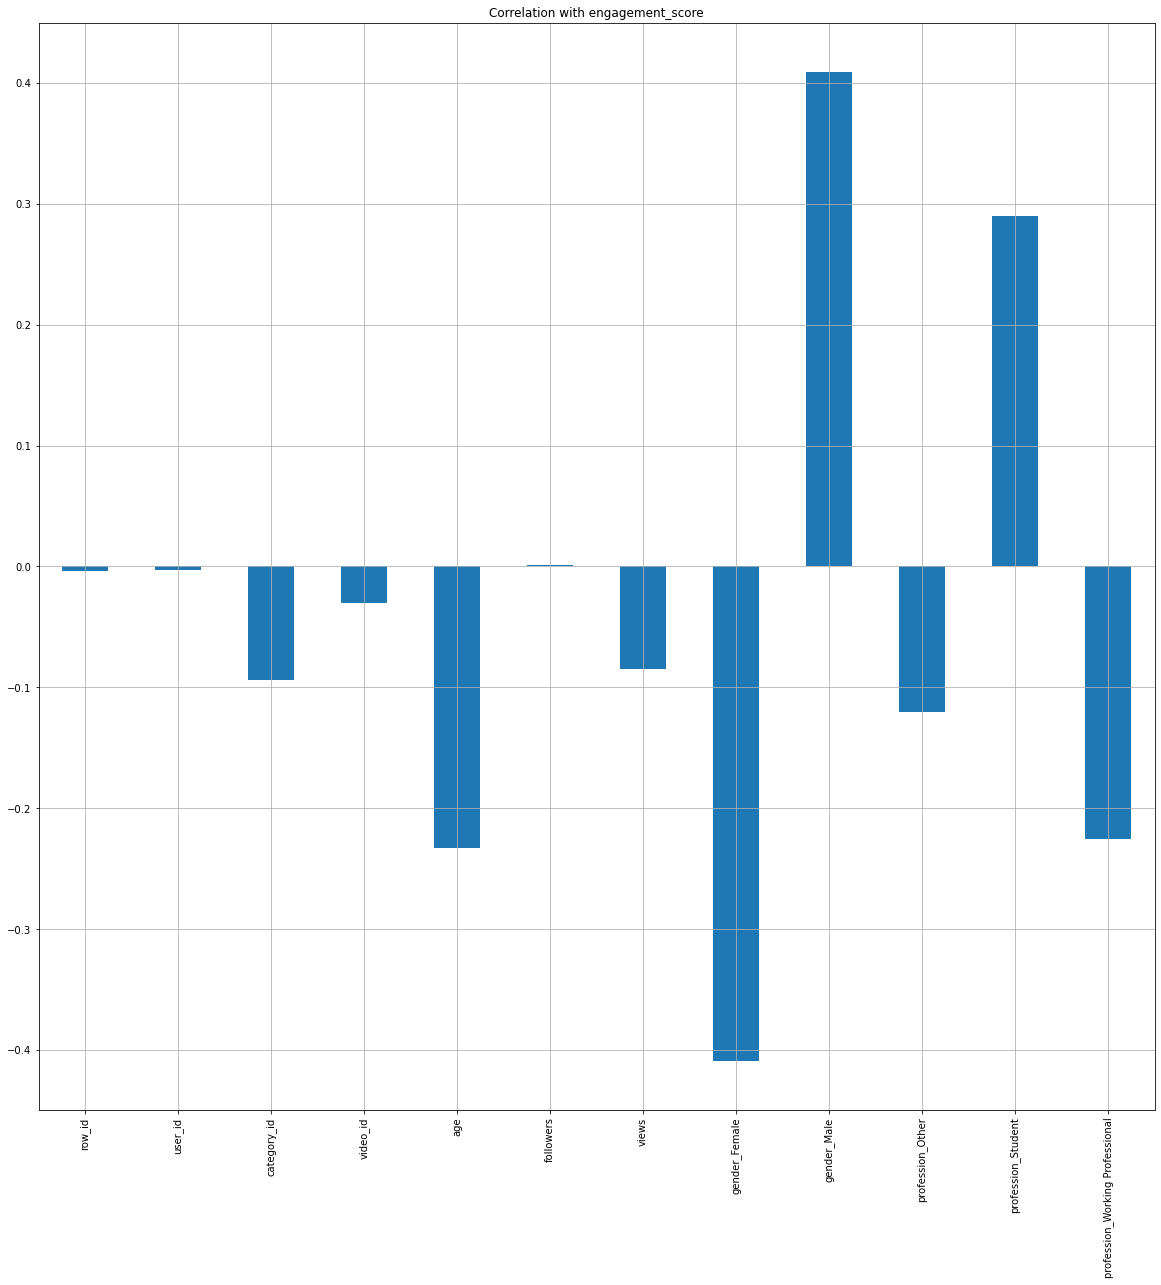

In [28]:
# visualize the correlation
data.drop('engagement_score', axis =1).corrwith(data['engagement_score']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with engagement_score')

<function matplotlib.pyplot.show(close=None, block=None)>

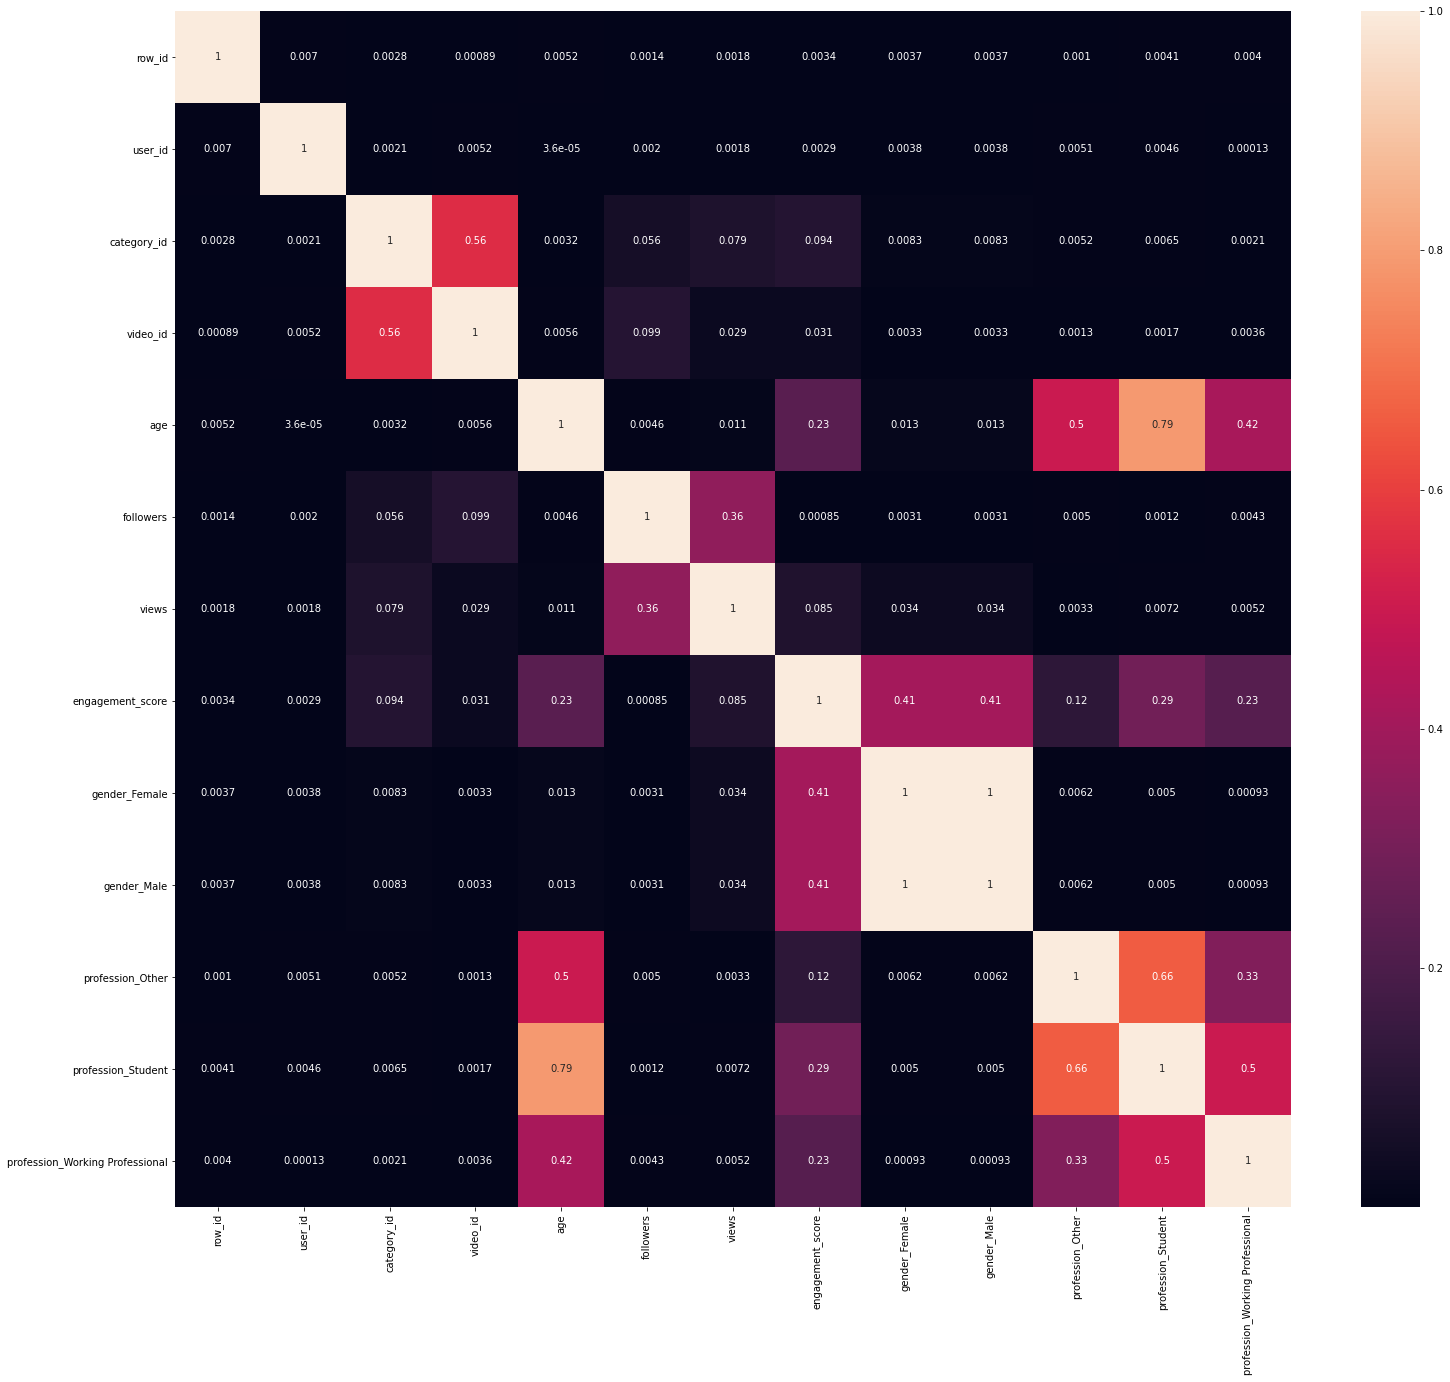

In [29]:
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

In [30]:
data.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'followers',
       'views', 'engagement_score', 'gender_Female', 'gender_Male',
       'profession_Other', 'profession_Student',
       'profession_Working Professional'],
      dtype='object')

In [31]:
data.shape

(89197, 13)

In [32]:
data.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,1,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,2,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,3,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,4,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,5,13626,23,112,27,220,613,3.13,0,1,0,0,1


In [33]:
data['category_id']

0        37
1        32
2        12
3        23
4        23
         ..
89192    15
89193    20
89194    16
89195     9
89196    25
Name: category_id, Length: 89197, dtype: int64

### Encoding

In [34]:
data

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,1,19990,37,128,24,180,1000,4.33,0,1,0,1,0
1,2,5304,32,132,14,330,714,1.79,1,0,0,1,0
2,3,1840,12,24,19,180,138,4.35,0,1,0,1,0
3,4,12597,23,112,19,220,613,3.77,0,1,0,1,0
4,5,13626,23,112,27,220,613,3.13,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,340,662,3.91,0,1,1,0,0
89193,89194,20466,20,47,31,240,892,3.56,0,1,1,0,0
89194,89195,13655,16,97,25,270,462,4.23,0,1,0,1,0
89195,89196,24840,9,18,35,230,819,3.77,0,1,0,0,1


In [35]:
data.shape

(89197, 13)

In [36]:
X = data.drop(columns=['engagement_score'],axis=1)
y = data.engagement_score

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

## model training

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
for i in range(700,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)

At random state 713 model perform very well
At random state 713
Training accuracy score is 27.24349615579721
Testing accuracy score is 27.182541081421785
At random state 724 model perform very well
At random state 724
Training accuracy score is 27.2338172102221
Testing accuracy score is 27.23978481426188
At random state 755 model perform very well
At random state 755
Training accuracy score is 27.248031710632148
Testing accuracy score is 27.15691864774553
At random state 775 model perform very well
At random state 775
Training accuracy score is 27.24052702785541
Testing accuracy score is 27.213683032506232
At random state 783 model perform very well
At random state 783
Training accuracy score is 27.23594565994101
Testing accuracy score is 27.243193997349092
At random state 784 model perform very well
At random state 784
Training accuracy score is 27.241841276312417
Testing accuracy score is 27.205744841799795
At random state 817 model perform very well
At random state 817
Training accu

### Random_state = 992

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=992)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,SCORERS
from sklearn.model_selection import train_test_split
import scikitplot as skplt

27.086953460284114
0.5743856736804867
RMSE : 0.7418568681480946


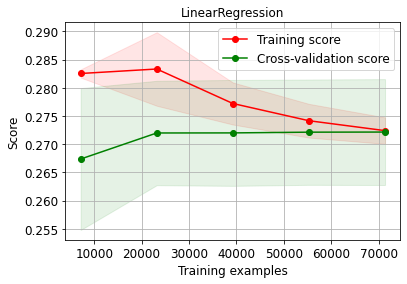

None


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(lr,X,y,cv=5,scoring='r2',text_fontsize='large',title='LinearRegression')
print(plt.show())

27.086965071539815
0.5743869755491774
RMSE : 0.7418568090784867


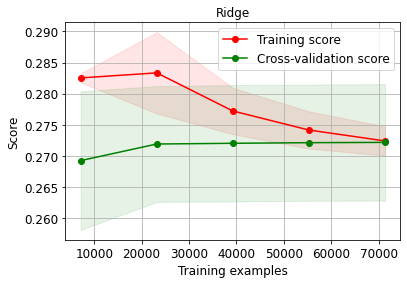

None


In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(ridge,X,y,cv=5,scoring='r2',text_fontsize='large',title='Ridge')
print(plt.show())

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))

36.16120122956173
0.5206511995515695
RMSE : 0.6941604285881708


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))

34.34286878769742
0.5375233145427317
RMSE : 0.7039769684333769


34.345067665332415
0.5375115818101587
RMSE : 0.7039651801314554


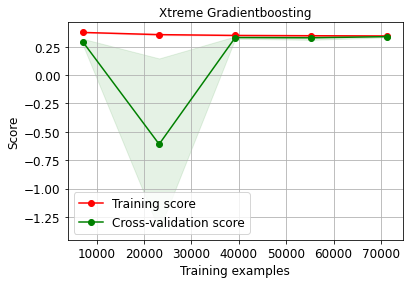

None


In [47]:
from xgboost import XGBRegressor
xgbt = GradientBoostingRegressor()
xgbt.fit(x_train,y_train)
pred = xgbt.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(xgbt,X,y,cv=5,scoring='r2',text_fontsize='large',title='Xtreme Gradientboosting')
print(plt.show())

### Cross validation

In [48]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr, X, y, cv=5)
print("Cross validation score of linear regression model is",scr.mean()*100)

Cross validation score of linear regression model is 27.21583561737786


In [49]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest regression model is",scr.mean()*100)

Cross validation score of Random forest regression model is 31.14380110210829


In [50]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of gradient boosting regression model is",scr.mean()*100)

Cross validation score of gradient boosting regression model is 33.902484347662416


In [51]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme gradient boosting regression model is",scr.mean()*100)

Cross validation score of xtreme gradient boosting regression model is 33.90408582732383


In [52]:
### gridsearchcv

In [ ]:
# from sklearn.model_selection import GridSearchCV

# creating parameter list to pass in Gridsearchcv
# parameter ={'learning_rate': np.arange(0.2,0.4,0.1),
            'min_samples_leaf':range(2,4,2),
            'min_samples_split':range(2,4,2),
            'n_estimators':range(100,110,2)
#           }
# GCV = GridSearchCV(gb,parameter,cv=5,scoring='accuracy')

## GCV.fit(x_train,y_train)  #fitting the data in model
# GCV.best_params_          #printing the best parameter found by Gridsearchcv
# GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting with best parameter
# print(r2_score(y_test,GCV_pred))

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.25,min_samples_leaf=2,min_samples_split=2,n_estimators=150,alpha=0.1)
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))

35.407080368369684
0.5300116122936964
RMSE : 0.698248412531614


##### we have improved our model by hypertuning 

In [57]:
test_data = pd.read_csv(r"E:\Data science\Job-a-thon\test_1zqHu22.csv")
test_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [60]:
test_data = pd.get_dummies(test_data)

In [61]:
X = test_data

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [63]:
test_pred=rf.predict(X)

In [64]:
test_pred

array([4.1311, 3.3767, 2.8611, ..., 3.6638, 3.6036, 3.2372])

In [65]:
submission_file=pd.read_csv(r"sample_submission_JPlpRcN.csv")
submission_file.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [66]:
submission_file.tail()

,row_id,engagement_score
11116,100314,5.0
11117,100315,5.0
11118,100316,5.0
11119,100317,5.0
11120,100318,5.0


In [67]:
series = pd.Series(test_pred)

In [68]:
submission_file['engagement_score'] = series

In [69]:
submission_file.head()

,row_id,engagement_score
0,89198,4.1311
1,89199,3.3767
2,89200,2.8611
3,89201,3.4516
4,89202,1.5075


In [70]:
submission_file.isnull().sum()

row_id              0
engagement_score    0
dtype: int64

In [71]:
submission_file.to_csv('submission_final.csv',columns=['row_id','engagement_score'],index=False)